https://www.kaggle.com/code/swapankumarshee/speech-emotion-reognition-ml

In [3]:
import pandas as pd
import numpy as np
import os
import seaborn  as sns 
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings 
warnings.filterwarnings('ignore')


In [10]:
path = []
labels = []
#os.walk find the files in top down 
for dirname, _, filenames in os.walk('C:/Users/uvais/Downloads/TESS Toronto emotional speech set data'):
    for filename in filenames:
        path.append(os.path.join(dirname,filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print("Data set is loaded")

Data set is loaded


In [11]:
path[:5]

['C:/Users/uvais/Downloads/TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:/Users/uvais/Downloads/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:/Users/uvais/Downloads/TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:/Users/uvais/Downloads/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:/Users/uvais/Downloads/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [12]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [13]:
#create  a dataframe
df = pd.DataFrame()
df['speech'] = path
df['labels'] = labels
df.head()

,speech,labels
0,C:/Users/uvais/Downloads/TESS Toronto emotiona...,angry
1,C:/Users/uvais/Downloads/TESS Toronto emotiona...,angry
2,C:/Users/uvais/Downloads/TESS Toronto emotiona...,angry
3,C:/Users/uvais/Downloads/TESS Toronto emotiona...,angry
4,C:/Users/uvais/Downloads/TESS Toronto emotiona...,angry


In [14]:
df['labels'].value_counts()

angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: labels, dtype: int64

# Exploratory Data Analysis

<AxesSubplot:xlabel='labels', ylabel='count'>

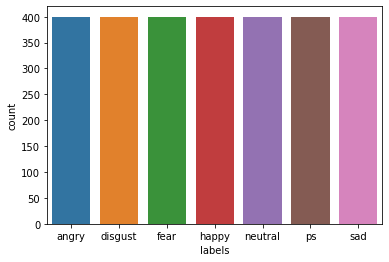

In [9]:
sns.countplot(df['labels'])


In [8]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data ,sr=sr)
    plt.show()
    
def spectograme(data , sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time',y_axis='hz')
    plt.colorbar()

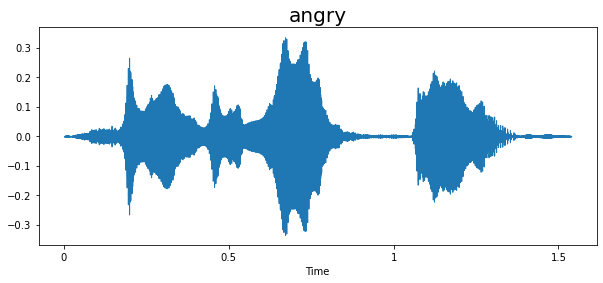

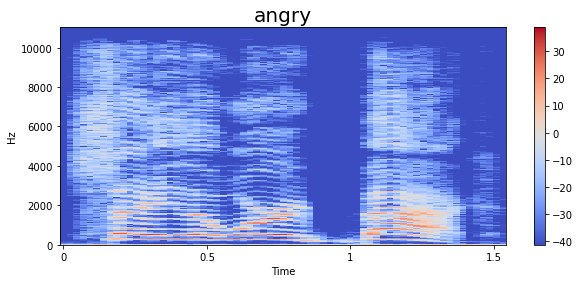

In [9]:
emotion = 'angry'
path1 = df['speech'][df['labels']==emotion][0]
data, sampling_rate = librosa.load(path1)
waveplot(data, sampling_rate, emotion)
spectograme(data, sampling_rate, emotion)
Audio(path1)


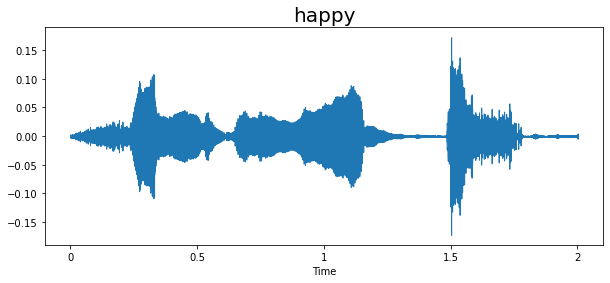

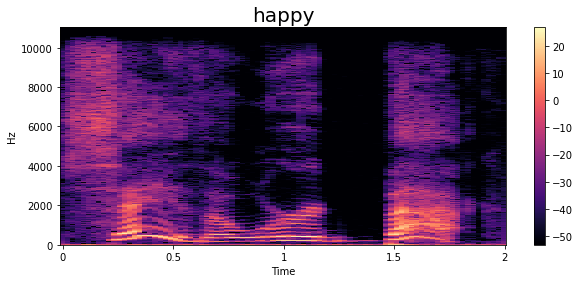

In [10]:
emotion = 'happy'
path1 = np.array(df['speech'][df['labels']==emotion])[0]
data, sampling_rate = librosa.load(path1)
waveplot(data, sampling_rate, emotion)
spectograme(data, sampling_rate, emotion)
Audio(path1)

Feature Extraction

In [12]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3,offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    return mfcc

In [13]:
extract_mfcc(df['speech'][0])

array([-3.9791476e+02,  7.8756226e+01, -2.0911753e+01, -2.0349020e+01,
       -3.4199812e+00,  1.1357657e+01, -2.1622475e+01, -4.8617826e+00,
       -8.4185266e+00,  6.2100196e-01, -2.9795790e+00,  1.3149229e+00,
       -3.4300953e-01,  2.3402820e+00,  1.9168801e+00,  3.7745941e+00,
       -5.5863881e+00, -3.6113353e+00, -2.3929298e+00, -9.5256548e+00,
       -8.2061357e+00, -1.2038864e+00, -7.5688171e+00,  9.9129763e+00,
        7.9321532e+00,  2.2083347e+01,  1.8905153e+01,  2.0599804e+01,
        1.3219537e+01,  8.4827595e+00,  3.0294439e-01,  5.1541729e+00,
        9.5726032e+00,  5.4089766e+00,  2.6034529e+00, -1.9647242e+00,
        5.0509210e+00,  9.0977497e+00,  2.3394349e+00, -2.1917243e+00],
      dtype=float32)

In [14]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))


In [15]:
X_mfcc

0       [-397.91476, 78.756226, -20.911753, -20.34902,...
1       [-466.53455, 99.911064, -0.48027304, -31.61629...
2       [-431.5178, 48.56504, -0.8924488, 2.2234, 0.18...
3       [-405.01205, 78.51893, -14.72178, -20.10229, -...
4       [-435.3804, 79.39025, 8.873596, 18.061928, 6.0...
                              ...                        
5595    [-408.0878, 82.66084, 30.182566, 48.84698, -3....
5596    [-428.43256, 104.70308, 22.652096, 45.17939, 2...
5597    [-380.35938, 83.53616, 32.67897, 42.358284, -7...
5598    [-436.16336, 91.74894, 26.539776, 41.395664, -...
5599    [-423.6657, 73.28961, 29.890434, 48.220123, 2....
Name: speech, Length: 5600, dtype: object

In [18]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [19]:
X = np.expand_dims(x, -1)
X.shape

(5600, 40, 1)

In [60]:
df['labels']

0       angry
1       angry
2       angry
3       angry
4       angry
        ...  
5595      sad
5596      sad
5597      sad
5598      sad
5599      sad
Name: labels, Length: 5600, dtype: object

In [21]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['labels']])

In [24]:
y = y.toarray()

In [62]:
y[0]

array([1., 0., 0., 0., 0., 0., 0.])

Create the LSTM Model 

In [27]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
model = Sequential([
    LSTM(123,return_sequences=False, input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

In [29]:
#Train the model
history = model.fit(X,y, validation_split=0.2,epochs=100, batch_size = 512,shuffle=True)

Epoch 1/100
9/9 [==============================] - 17s 89ms/step - loss: 1.8263 - accuracy: 0.2855 - val_loss: 1.8054 - val_accuracy: 0.3045
Epoch 2/100
9/9 [==============================] - 0s 20ms/step - loss: 1.5856 - accuracy: 0.4196 - val_loss: 1.6226 - val_accuracy: 0.3214
Epoch 3/100
9/9 [==============================] - 0s 19ms/step - loss: 1.2992 - accuracy: 0.5312 - val_loss: 1.3748 - val_accuracy: 0.4696
Epoch 4/100
9/9 [==============================] - 0s 19ms/step - loss: 0.9671 - accuracy: 0.6616 - val_loss: 0.8912 - val_accuracy: 0.5857
Epoch 5/100
9/9 [==============================] - 0s 19ms/step - loss: 0.6463 - accuracy: 0.7857 - val_loss: 0.5164 - val_accuracy: 0.8009
Epoch 6/100
9/9 [==============================] - 0s 19ms/step - loss: 0.4241 - accuracy: 0.8719 - val_loss: 0.2467 - val_accuracy: 0.9366
Epoch 7/100
9/9 [==============================] - 0s 18ms/step - loss: 0.3138 - accuracy: 0.9009 - val_loss: 0.1881 - val_accuracy: 0.9527
Epoch 8/100
9/9 [==

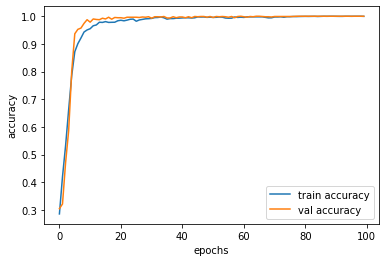

In [32]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.legend()
plt.ylabel('accuracy')
plt.show()

In [33]:
import pickle
filename = 'emotion_audio_model.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://2ed167a1-d907-425c-8821-f8c0dd736655/assets


INFO:tensorflow:Assets written to: ram://2ed167a1-d907-425c-8821-f8c0dd736655/assets


In [39]:
from tensorflow.keras.models import load_model
model1 = load_model('emotion_audio_model.h')

In [47]:
test_accuracy = model.evaluate(X,y,verbose=0)
print(test_accuracy[1])

1.0


In [51]:
model.predict(X)[0]

array([1.00000000e+00, 1.11904652e-10, 1.12275154e-10, 1.24509136e-09,
       3.21133364e-09, 1.77886339e-09, 7.05007608e-09], dtype=float32)

In [59]:
filename = "C:/Machine Learning/Toronto _emo_ speech/OAF_happy/OAF_back_happy.wav"
prediction_feature = extract_mfcc(filename)
prediction_feature = prediction_feature.reshape(1,-1)
#s = model.predict(prediction_feature)
y_predict = np.argmax(model.predict(prediction_feature), axis=-1)
y_predict
#model2 = enc.inverse_transform(y_predict)
#model2

array([3], dtype=int64)